<a href="https://colab.research.google.com/github/gyuheon1/AIStudy24/blob/master/%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이번에는 여름에 농어철로 농어 주문이 크게 늘어서 MBC마켓에서 업계최초로 농어를 무게 단위로 판매하나 함

 무게단위로 판매를 하면 가격 측정도 원활하고 고객도 합리적으로 판단 할 수 있다.

  그런데 공급처에서 생선 무게를 잘못 측정해서 보낼 수도  있다.


*   농어의 무게를 재측정해야 한다.
*   다른 데이터는 정상범위가 있으니 예측할 수 있을까?
*   이렇게 예측하는 것을 "회귀" 라고 한다.
*   샘플 데이터가 필요하다
*   외부에서 56개의 샘플데이터를 받는다

지도학습은 크게 2가지로 나누어짐

*   분류
*   회귀



In [2]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and direc

In [3]:
import numpy as np
# 농어의 샘플자료 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

기초자료


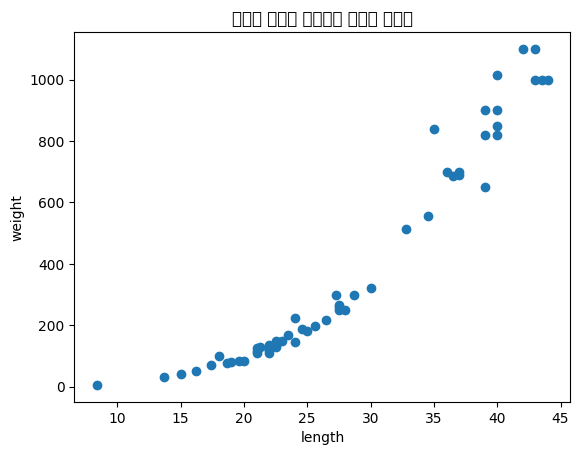

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')   # 한글처리

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
print('기초자료')
plt.title('농어의 길이가 커질수록 무게가 늘어남')
plt.show()
# 산점도를 그리고 나니 길이가 커짐에 따라 무게도 늘어난다
# 이 데이터를 토대로 훈련과 테스트를 진행

In [ ]:
# k-최근접 이웃 알고리즘에서의 회귀

# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측함
# k=3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단
# 회귀는 샘플에 가장 가까운 샘플 k개를 선택
# 타깃값 100, 80, 60을 더해 3으로 나눈 평균이 타깃값으로 사용됨

In [5]:
# 사이킷런에서 제공하는 훈련세트, 테스트세트 생성
from sklearn.model_selection import train_test_split
# 사이킷 런의 train_teat_split 함수를 사용해 훈련세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# random_state=42 서로 같은 테스트를 위해 시드값 제공
# 사이킷 런에 사용할 훈련 세트는 2차원 배열을 사용
# perch_length가 1차원 배열이기때문에 이를 나눈 train_input과 test_input도 1차원 배열임
# [3,] -> [3,1] 2차원 배열을 사용해야 함으로 억지로 변환 reshape() 메서드 활용 (4,) -> (2,2)
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [6]:
# 2차원 배열로 변환
test_array = test_array.reshape(2,2)
print(test_array.shape)
# 전에는 2개의 특성으로 사용 했었기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용 했었지만
# 이번에는 특성이 1개로 수동으로 2차원 배열을 만들어야 된다. -> 넘파이 .reshape() 활용
# (4,) -> (2,2) 크기로 바꿔줌

(2, 2)


In [7]:
print(test_input)

[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]


In [8]:
print(train_input)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


In [9]:
print(test_array)

[[1 2]
 [3 4]]


In [10]:
# 입력데이터인 train_input과 test_input을 2차원 배열로 바꿔야 함
# train_input(42,) -> (42,1) -> train_input.reshape(42,1)
# 넘파이는 배열의 크기를 자동으로 지정하는 기능이 있다. -1 값을 넣으면 된다.
train_input = train_input.reshape(-1,1) # -1을 지정하면 원소 개수로 모두 채우라는 의미 , 1은 두번째
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)  # -1을 사용하면 매번 원소 크기를 외우지 않아도 됨 (42개, 14개로 나눠짐)
# 전처리 끝

(42, 1) (14, 1)


In [11]:
# 훈련 시작
# from sklearn.neighbors import KNeighborsClassifier  # k-이웃 근접 알고리즘, 분류용
from sklearn.neighbors import KNeighborsRegressor # 회귀 알고리즘용 구현 클래스

knr = KNeighborsRegressor() # 회귀용 객체 생성
knr.fit(train_input, train_target) # 회귀용으로 훈련

KNeighborsRegressor()

In [12]:
knr.score(test_input, test_target)
# 분류의 경우 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) -> 예측값
# 회귀인 경우 평가를 결정 계수라고 한다. R^2
# R^2 = 1 - ((타깃 - 예측)^2의 합) / ((타깃 - 평균)^2의 합)
# 타깃의 평균 정도를 예측하는 수준 -> R^2는 0에 가까워지고, 예측이 타깃에 가까워지면 1에 가까운 값

0.992809406101064

In [13]:
from sklearn.metrics import mean_absolute_error
# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공
# mean_absolute_error 절대값 오차를 평균하여 반환
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 예측(prediction)을 만든다.
mae = mean_absolute_error(test_target, test_prediction)
# 테스트 세트에 대한 평균 절댓값 오차를 계산
print(mae)  # 19g 정도 타깃값과 다르다(타깃과 예측한 값 사이의 차이)

19.157142857142862


In [14]:
print(knr.score(train_input, train_target)) # 훈련한 모델을 사용해 훈련세트 점수확인

0.9698823289099254


In [15]:
# 위 결과를 보면 모델을 훈련 세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어짐
# 이 모델을 훈련세트와 테스트 세트에서 평가하면 두 값중에 어느 것이 높을까?
# 보통 훈련세트의 점수가  조금 더 높게 나온다.

# 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁘면 과대적합
# 훈련세트보다 테스트 세트 점수가 높을때, 두 점수가 모두 낮은 경우 과소적합

# 사이킷 런의 알고리즘 기본값을 3개로 조절 해보기
knr.n_neighbors = 3 # 모델을 다시 훈련 합니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [16]:
print(knr.score(test_input, test_target))   # 이웃 개수 조정으로 과대,과소 적합 해결

0.9746459963987609


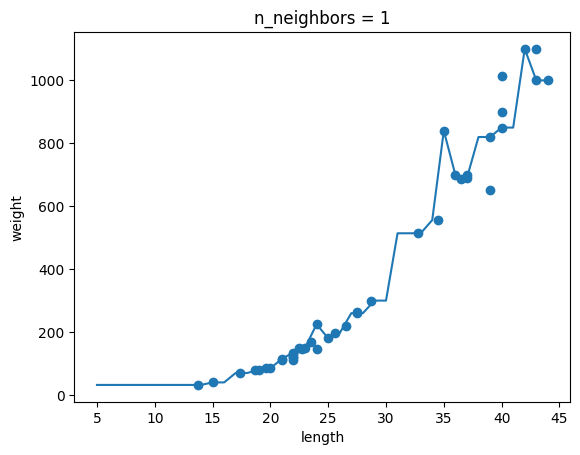

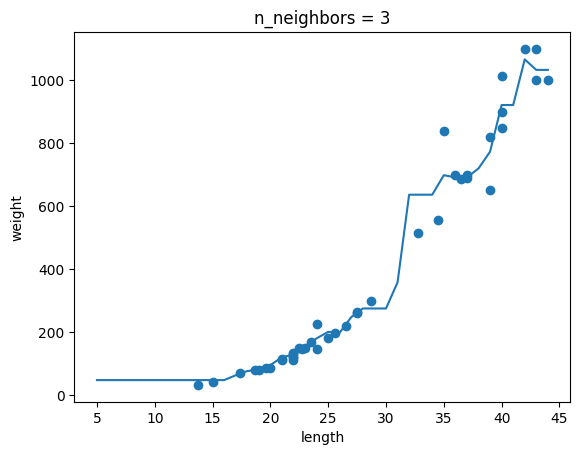

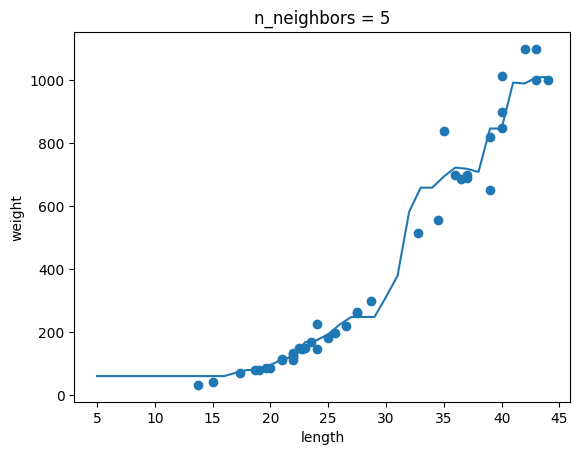

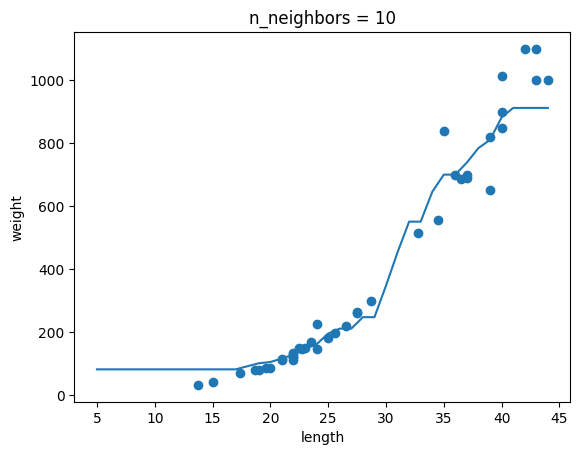

In [17]:
# k-최근접 이웃 회귀 객체
knr = KNeighborsRegressor()
# 5에서 45까지 x좌표를 만든다
x = np.arange(5, 45).reshape(-1,1)

# n = 1,3,5,10일대 예측 결과를 그래프로 그린다.
for n in [1,3,5,10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 훈련 세트 점수와 테스트 세트 점수를 계산
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()